# gaming dataset
## capstone project

In [3]:
#%%capture
#pip install snscrape

In [1]:
%%capture
import snscrape  ##Importing for scrape the data through twitter
import pandas as pd ##Importing pandas library
import regex as re ##Importing Regular Expression
import nltk ##Importing Natural Language Toolkit to perfom NLP operations
from nltk.corpus import stopwords ##Importing Stopwords from nltk corpus

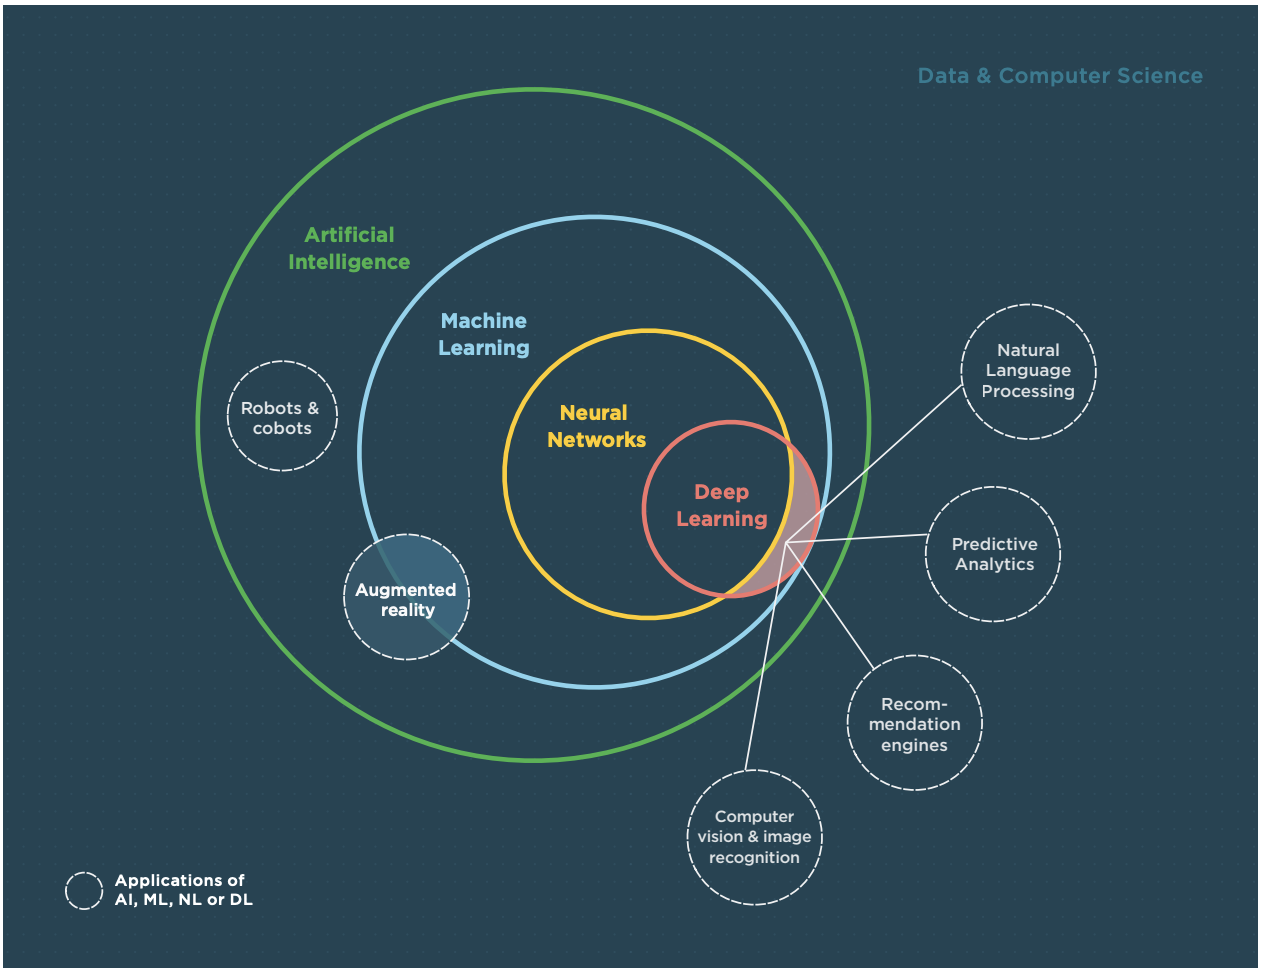

# What is natural language processing?

## Natural language processing, which evolved from computational linguistics, uses methods from various disciplines, such as computer science, artificial intelligence, linguistics, and data science, to enable computers to understand human language in both written and verbal forms. While computational linguistics has more of a focus on aspects of language, natural language processing emphasizes its use of machine learning and deep learning techniques to complete tasks, like language translation or question answering.

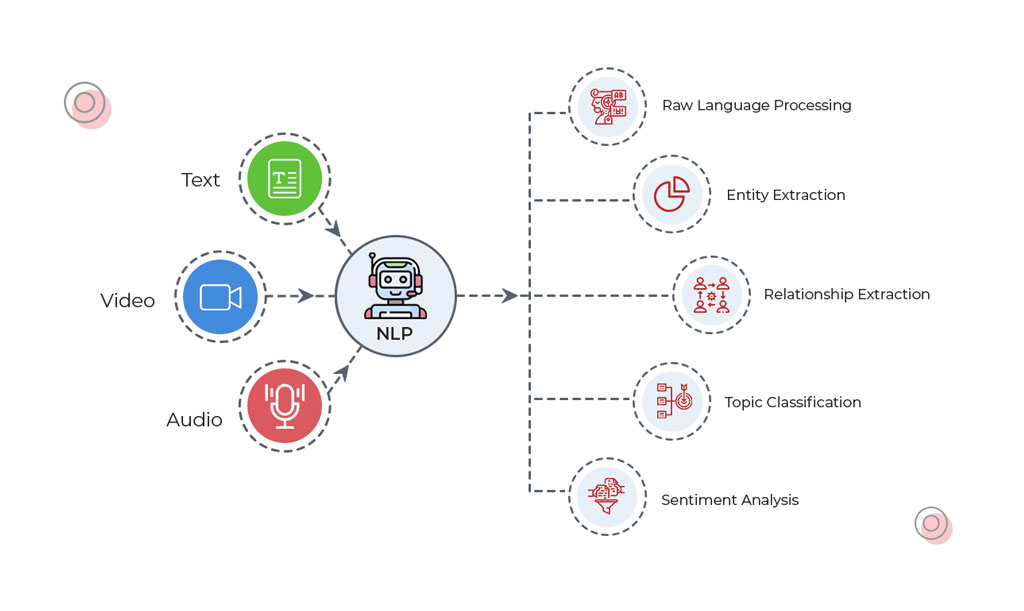

# How Can Sentiment Analysis be Used ?

# The main motive of using sentiment analysis is to find out the true feelings of the varied people living in our society. It can be used for analyzing the customer’s feedback of a particular company, normal users on social media towards a product, services, social issues, or political agendas.
## Companies also use it for brand analysis, reputation crises, campaigns performances, competitor analysis, and improve the service offered to the customers. Analyzing the sentiments of the customers helps the customer support team to prioritize their work for offering better service to end-users.

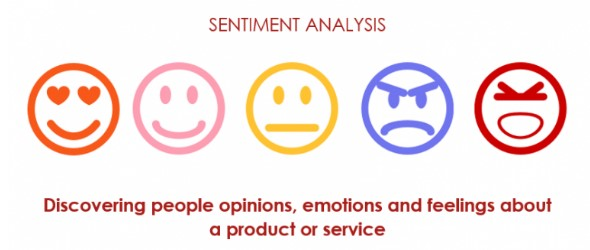

# Why Sentiment Analysis is Difficult ?


## Sentiment analysis is a very difficult task due to sarcasm. The words or text data implied in a sarcastic sentence come with a different sense of meaning depending on the senders or situations.

### Sarcasm is remarking someone opposite of what you want to say. It is expressed to hurt someone’s feelings or humorously criticize something. On social media, sarcasm is one of the most common behavior you can see nowadays interfering with the results.

In [2]:
nltk.download('words') ##Downlaoding words through nltk 
nltk.download('stopwords') ##Downloading stopwords through nltk

True

In [3]:
##making dataframe with help of panda
data = pd.read_json("R:/DBA_SEM_4/firstDATAGaming2021-2.json", lines=True)

In [4]:
#To get the shape of the data.
print("MY datase shape", data.shape)

MY datase shape (1122440, 28)


Here my dataset has 1122k records and 28 attributes.

In [5]:
#There is more attributes in my dataframe therefore assigning display option as max columns. 
pd.set_option('display.max_columns', None)

#by default, Python will likely display only the first 50 characters from a long text.
pd.options.display.max_colwidth = 1000

#First 5 records of my dataset
data.head()

##ta.head(10).to_csv('R:/DBA_SEM_4/402 Capstone/mainhead.csv')

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/BR0BOKEN/status/1410025253770776579,2021-06-29 23:59:52+00:00,Stream Schedule:\n\n6/29/21 - 8:15 PM EST\n6/30/21 - Lunch Stream\n7/1/21 - Lunch Stream + 6:30 PM EST\n7/2/21 - Off\n7/3/21 - Off\n\n#twitch #twitchstreaming #twitchaffiliate #codclips #streaming #gaming\n\nhttps://t.co/qAte5gJwuf https://t.co/qGkDyFUpoL,Stream Schedule:\n\n6/29/21 - 8:15 PM EST\n6/30/21 - Lunch Stream\n7/1/21 - Lunch Stream + 6:30 PM EST\n7/2/21 - Off\n7/3/21 - Off\n\n#twitch #twitchstreaming #twitchaffiliate #codclips #streaming #gaming\n\ntwitch.tv/br0boken https://t.co/qGkDyFUpoL,1410025253770776579,"{'_type': 'snscrape.modules.twitter.User', 'username': 'BR0BOKEN', 'id': 1266223839496802305, 'displayname': 'ryan gerrity', 'description': 'I like dogs more than people | Model | Streamer | TikTok Verified | @Twitch Affiliate | @Giants | BKNets | NJDevils | Video Games & Gambling have my ♥️', 'rawDescription': 'I like dogs more than people | Model | Streamer | TikTok Verified | @Twitch Affiliate | @Giants | BKNets | NJDevils | Video Games & Gambling have my ♥️', 'descriptionUrls': None, 'verified': False, 'created': '2020-05-29T04:24:36+00:00', 'followersCount': 733, 'friendsCount': 1495, 'statusesCount': 8202, 'favouritesCount': 10753, 'listedCount': 2, 'mediaCount': 1676, 'location': 'Hoboken/Jersey City', 'protected': False, 'linkUrl': 'https://linktr.ee/Br0boken', 'linkTcourl': 'https://t.co/IkIRSKgtae', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1481047526967021573/Vysiu0rr_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/12662238394968023...",1,6,4,0,1410025253770776579,en,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",https://mobile.twitter.com,Twitter Web App,[http://twitch.tv/br0boken],[https://t.co/qAte5gJwuf],"[{'_type': 'snscrape.modules.twitter.Gif', 'thumbnailUrl': 'https://pbs.twimg.com/tweet_video_thumb/E5FqfPcXIAUIsJn.jpg', 'variants': [{'_type': 'snscrape.modules.twitter.VideoVariant', 'contentType': 'video/mp4', 'url': 'https://video.twimg.com/tweet_video/E5FqfPcXIAUIsJn.mp4', 'bitrate': 0}]}]",NaN,None,NaN,None,None,None,None,"[twitch, twitchstreaming, twitchaffiliate, codclips, streaming, gaming]",None
1,snscrape.modules.twitter.Tweet,https://twitter.com/nerdynood/status/1410025206626852869,2021-06-29 23:59:40+00:00,Did y'all know I'm live? Like right now?! You didn't!? Well come and hang out y'all 😝🥰 \nhttps://t.co/yY4rHRVePM\n\n#smallstreamer #gaming #ApexLegends #twitchstreaming #twitchaffiliate #twitch #gamer #girlgamer,Did y'all know I'm live? Like right now?! You didn't!? Well come and hang out y'all 😝🥰 \nTwitch.tv/NerdyNoodle16\n\n#smallstreamer #gaming #ApexLegends #twitchstreaming #twitchaffiliate #twitch #gamer #girlgamer,1410025206626852869,"{'_type': 'snscrape.modules.twitter.User', 'username': 'nerdynood', 'id': 1100879976633634816, 'displayname': 'NerdyNoodle | EcG ❄️', 'description': 'Kat || 24 || Variety streamer 🎮 Ramen Lover 🍜 Content Creator✌🏻Anime Lover 😋 Part of the @EncourageG Stream Team Biz Inquiries: nerdynoodleco@gmail.com', 'rawDescription': 'Kat || 24 || Variety streamer 🎮 Ramen Lover 🍜 Content Creator✌🏻Anime Lover 😋 Part of the @EncourageG Stream Team Biz Inquiries: nerdynoodleco@gmail.com', 'descriptionUrls': None, 'verified': False, 'created': '2019-02-27T22:06:54+00:00', 'followersCount': 324, 'friendsCount': 184, 'statusesCount': 2986, 'favouritesCount': 7044, 'listedCount': 3, 'mediaCount': 166, 'location': 'Pennsylvania, USA', 'protected': False, 'linkUrl': 'https://linktr.ee/NerdyNoodle', 'linkTcourl': 'https://t.co/BXVeyx4IBX', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/146504786049234

In [6]:
##last 5 recorda of my dataset
data.tail()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
1122435,snscrape.modules.twitter.Tweet,https://twitter.com/NaconGER/status/1344795475921281024,2021-01-01 00:00:01+00:00,Wir wünschen euch ein frohes neues Jahr!\n\n#happynewyear #2021 #gaming #nacon https://t.co/WTWUGzpT2L,Wir wünschen euch ein frohes neues Jahr!\n\n#happynewyear #2021 #gaming #nacon https://t.co/WTWUGzpT2L,1344795475921281024,"{'_type': 'snscrape.modules.twitter.User', 'username': 'NaconGER', 'id': 4288775420, 'displayname': 'Nacon Deutschland', 'description': 'NACON - Dein professionelles Gaming-Zubehör! #TeamNacon #Nacon #revealyourskills', 'rawDescription': 'NACON - Dein professionelles Gaming-Zubehör! #TeamNacon #Nacon #revealyourskills', 'descriptionUrls': None, 'verified': False, 'created': '2015-11-19T10:21:35+00:00', 'followersCount': 993, 'friendsCount': 125, 'statusesCount': 477, 'favouritesCount': 1649, 'listedCount': 1, 'mediaCount': 190, 'location': 'Deutschland', 'protected': False, 'linkUrl': 'https://www.nacongaming.com/de-DE/', 'linkTcourl': 'https://t.co/UeKVYgH5mS', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1419962656212066305/cfcHEL4b_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/4288775420/1628063142', 'label': None, 'url': 'https://twitter.com/NaconGER'}",0,2,4,0,1344795475921281024,de,"<a href=""https://studio.twitter.com"" rel=""nofollow"">Twitter Media Studio</a>",https://studio.twitter.com,Twitter Media Studio,None,None,"[{'_type': 'snscrape.modules.twitter.Photo', 'previewUrl': 'https://pbs.twimg.com/media/Eqf7sm9XMAEB1iw?format=jpg&name=small', 'fullUrl': 'https://pbs.twimg.com/media/Eqf7sm9XMAEB1iw?format=jpg&name=large'}]",NaN,None,NaN,None,None,None,None,"[happynewyear, gaming, nacon]",None
1122436,snscrape.modules.twitter.Tweet,https://twitter.com/UGS_Official_/status/1344795475300528128,2021-01-01 00:00:01+00:00,"Buy a Terraria Game Server now, we offer only the best services and performance in the market!\nUltimate Game Servers - Offering High-End game hosting servers.\n\nhttps://t.co/hN74KZ8K5H\n\n#Terraria #GameServer #GameServers #HostingServers #Gaming #Game #Videogames #Servers https://t.co/7NEu8ccszt","Buy a Terraria Game Server now, we offer only the best services and performance in the market!\nUltimate Game Servers - Offering High-End game hosting servers.\n\nultimategameserver.com/gameservers/te…\n\n#Terraria #GameServer #GameServers #HostingServers #Gaming #Game #Videogames #Servers https://t.co/7NEu8ccszt",1344795475300528128,"{'_type': 'snscrape.modules.twitter.User', 'username': 'UGS_Official_', 'id': 719977572549808128, 'displayname': 'Ultimate Game Server', 'description': '', 'rawDescription': '', 'descriptionUrls': None, 'verified': False, 'created': '2016-04-12T19:56:44+00:00', 'followersCount': 24, 'friendsCount': 11, 'statusesCount': 476, 'favouritesCount': 0, 'listedCount': 0, 'mediaCount': 476, 'location': '', 'protected': False, 'linkUrl': 'http://ultimategameserver.com/', 'linkTcourl': 'https://t.co/s6cuFO55RB', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1253410625314668544/dGQxLEvn_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/719977572549808128/1587671127', 'label': None, 'url': 'https://twitter.com/UGS_Official_'}",0,1,0,0,1344795475300528128,en,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",https://about.twitter.com/products/tweetdeck,TweetDeck,[https://ultimategameserver.com/gameservers/terraria.php],[https://t.co/hN74KZ8K5H],"[{'_type': 'snscrape.modules.twitter.Photo', 'previewUrl': 'https://pbs.twimg.com/media/EqXjO-OXAAAk9RZ?format=jpg&name=small', 'fullUrl': 'https://pbs.twimg.com/media/EqXjO-OXAAAk9RZ?format=jpg&name=large'}]",NaN,None,NaN,None,N

In [7]:
#Info of Gaming Dataset
data.info()

##Saving data_info as CSV
#Gaming_Data_info = data.info()
#Gaming_Data_info.to_csv("R:/DBA_SEM_4/402 Capstone/Gaming_Data_info.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122440 entries, 0 to 1122439
Data columns (total 28 columns):
 #   Column            Non-Null Count    Dtype              
---  ------            --------------    -----              
 0   _type             1122440 non-null  object             
 1   url               1122440 non-null  object             
 2   date              1122440 non-null  datetime64[ns, UTC]
 3   content           1122440 non-null  object             
 4   renderedContent   1122440 non-null  object             
 5   id                1122440 non-null  int64              
 6   user              1122440 non-null  object             
 7   replyCount        1122440 non-null  int64              
 8   retweetCount      1122440 non-null  int64              
 9   likeCount         1122440 non-null  int64              
 10  quoteCount        1122440 non-null  int64              
 11  conversationId    1122440 non-null  int64              
 12  lang              1122440 no

In [8]:
#Names of columns in dataset
print("Column Names In my dataset:""\n", data.columns)

Column Names In my dataset:
 Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags'],
      dtype='object')


In [9]:
#just assigning dataframe to new variable and start some insights and results. 
dataset = data

In [10]:
#Saving the daaframe to "csv" to eventually it will reduce the size of dataset comparing to data stored in "json".
#dataset.to_csv("R:/DBA_SEM_4/402 Capstone/GamingDatabase.csv", index = False)

In [11]:
data1 = pd.read_csv("R:/DBA_SEM_4/402 Capstone/GamingDatabase.csv")

In [12]:
#First 10 rows of dataset
data1.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/BR0BOKEN/status/1410025253770776579,2021-06-29 23:59:52+00:00,Stream Schedule:\n\n6/29/21 - 8:15 PM EST\n6/30/21 - Lunch Stream\n7/1/21 - Lunch Stream + 6:30 PM EST\n7/2/21 - Off\n7/3/21 - Off\n\n#twitch #twitchstreaming #twitchaffiliate #codclips #streaming #gaming\n\nhttps://t.co/qAte5gJwuf https://t.co/qGkDyFUpoL,Stream Schedule:\n\n6/29/21 - 8:15 PM EST\n6/30/21 - Lunch Stream\n7/1/21 - Lunch Stream + 6:30 PM EST\n7/2/21 - Off\n7/3/21 - Off\n\n#twitch #twitchstreaming #twitchaffiliate #codclips #streaming #gaming\n\ntwitch.tv/br0boken https://t.co/qGkDyFUpoL,1410025253770776579,"{'_type': 'snscrape.modules.twitter.User', 'username': 'BR0BOKEN', 'id': 1266223839496802305, 'displayname': 'ryan gerrity', 'description': 'I like dogs more than people | Model | Streamer | TikTok Verified | @Twitch Affiliate | @Giants | BKNets | NJDevils | Video Games & Gambling have my ♥️', 'rawDescription': 'I like dogs more than people | Model | Streamer | TikTok Verified | @Twitch Affiliate | @Giants | BKNets | NJDevils | Video Games & Gambling have my ♥️', 'descriptionUrls': None, 'verified': False, 'created': '2020-05-29T04:24:36+00:00', 'followersCount': 733, 'friendsCount': 1495, 'statusesCount': 8202, 'favouritesCount': 10753, 'listedCount': 2, 'mediaCount': 1676, 'location': 'Hoboken/Jersey City', 'protected': False, 'linkUrl': 'https://linktr.ee/Br0boken', 'linkTcourl': 'https://t.co/IkIRSKgtae', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1481047526967021573/Vysiu0rr_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/12662238394968023...",1,6,4,0,1410025253770776579,en,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",https://mobile.twitter.com,Twitter Web App,['http://twitch.tv/br0boken'],['https://t.co/qAte5gJwuf'],"[{'_type': 'snscrape.modules.twitter.Gif', 'thumbnailUrl': 'https://pbs.twimg.com/tweet_video_thumb/E5FqfPcXIAUIsJn.jpg', 'variants': [{'_type': 'snscrape.modules.twitter.VideoVariant', 'contentType': 'video/mp4', 'url': 'https://video.twimg.com/tweet_video/E5FqfPcXIAUIsJn.mp4', 'bitrate': 0}]}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['twitch', 'twitchstreaming', 'twitchaffiliate', 'codclips', 'streaming', 'gaming']",NaN
1,snscrape.modules.twitter.Tweet,https://twitter.com/nerdynood/status/1410025206626852869,2021-06-29 23:59:40+00:00,Did y'all know I'm live? Like right now?! You didn't!? Well come and hang out y'all 😝🥰 \nhttps://t.co/yY4rHRVePM\n\n#smallstreamer #gaming #ApexLegends #twitchstreaming #twitchaffiliate #twitch #gamer #girlgamer,Did y'all know I'm live? Like right now?! You didn't!? Well come and hang out y'all 😝🥰 \nTwitch.tv/NerdyNoodle16\n\n#smallstreamer #gaming #ApexLegends #twitchstreaming #twitchaffiliate #twitch #gamer #girlgamer,1410025206626852869,"{'_type': 'snscrape.modules.twitter.User', 'username': 'nerdynood', 'id': 1100879976633634816, 'displayname': 'NerdyNoodle | EcG ❄️', 'description': 'Kat || 24 || Variety streamer 🎮 Ramen Lover 🍜 Content Creator✌🏻Anime Lover 😋 Part of the @EncourageG Stream Team\nBiz Inquiries: nerdynoodleco@gmail.com', 'rawDescription': 'Kat || 24 || Variety streamer 🎮 Ramen Lover 🍜 Content Creator✌🏻Anime Lover 😋 Part of the @EncourageG Stream Team\nBiz Inquiries: nerdynoodleco@gmail.com', 'descriptionUrls': None, 'verified': False, 'created': '2019-02-27T22:06:54+00:00', 'followersCount': 324, 'friendsCount': 184, 'statusesCount': 2986, 'favouritesCount': 7044, 'listedCount': 3, 'mediaCount': 166, 'location': 'Pennsylvania, USA', 'protected': False, 'linkUrl': 'https://linktr.ee/NerdyNoodle', 'linkTcourl': 'https://t.co/BXVeyx4IBX', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/146

In [14]:
#Total records in my dataset
len(data1)

1122440

In [16]:
#total records and attributes in my dataset
data1.shape

(1122440, 28)

In [19]:
#Basics Statistics
pd.set_option("display.precision", 3)
data1.describe()

,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,retweetedTweet,inReplyToTweetId
count,1.122e+06,1.122e+06,1.122e+06,1.122e+06,1.122e+06,1.122e+06,0.0,4.355e+04
mean,1.377e+18,3.292e-01,1.654e+00,4.012e+00,9.606e-02,1.377e+18,NaN,1.376e+18
std,1.854e+16,9.009e+00,3.239e+01,3.669e+01,9.309e+00,1.883e+16,NaN,2.221e+16
min,1.345e+18,0.000e+00,0.000e+00,0.000e+00,0.000e+00,4.587e+17,NaN,4.587e+17
25%,1.361e+18,0.000e+00,0.000e+00,0.000e+00,0.000e+00,1.361e+18,NaN,1.362e+18
50%,1.377e+18,0.000e+00,0.000e+00,1.000e+00,0.000e+00,1.377e+18,NaN,1.374e+18
75%,1.393e+18,0.000e+00,2.000e+00,3.000e+00,0.000e+00,1.393e+18,NaN,1.392e+18
max,1.410e+18,4.910e+03,2.743e+04,1.566e+04,7.299e+03,1.410e+18,NaN,1.410e+18


In [20]:
#In general .describe() only analyzes numeric columns by default here I pass object as one.
data1.describe(include=object)

,_type,url,date,content,renderedContent,user,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,quotedTweet,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
count,1122440,1122440,1122440,1122440,1122440,1122440,1122440,1122440,1122440,1122440,759017,759017,528343,38545,43553,278061,12954,12948,1122363,12061
unique,1,1122440,1056005,1056551,1031960,204109,51,1104,935,1104,445082,485405,522699,30650,16823,102548,2911,2507,621962,2993
top,snscrape.modules.twitter.Tweet,https://twitter.com/BR0BOKEN/status/1410025253770776579,2021-05-19 18:12:22+00:00,First thing I'm doing with my 11th Gen Intel® Core™ H-series Processor is #Gaming,gleam.io/3Lx6M/sfund-nf… #BSC #NFT #Gaming #NFTGaming #Ideathon #BinanceSmartChain #GameDevelopment #Blockchain #SFUND,"{'_type': 'snscrape.modules.twitter.User', 'username': 'CustomPC_UK', 'id': 927520924940763137, 'displayname': 'CUSTOM PC BUILDER UK 🇬🇧', 'description': 'Clients hire us to build & test their Custom PC for Gaming, Live Streaming, VR, Video Editing, DAW, CAD Workstations and Home Cinema! + Repairs & Upgrades', 'rawDescription': 'Clients hire us to build & test their Custom PC for Gaming, Live Streaming, VR, Video Editing, DAW, CAD Workstations and Home Cinema! + Repairs & Upgrades', 'descriptionUrls': None, 'verified': False, 'created': '2017-11-06T12:59:55+00:00', 'followersCount': 267, 'friendsCount': 180, 'statusesCount': 8597, 'favouritesCount': 7697, 'listedCount': 0, 'mediaCount': 645, 'location': 'Birmingham, England', 'protected': False, 'linkUrl': 'https://g.page/r/Cc38ga5vKlIIEAE', 'linkTcourl': 'https://t.co/Nmc6XxfyiO', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1112352523678113792/ofceCUdH_normal.png', 'profileBannerUrl': 'https://pbs.twimg.com/profile_ban...",en,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",https://mobile.twitter.com,Twitter Web App,['https://gleam.io/3Lx6M/sfund-nftgaming-ideathon-awareness-campaign-lottery'],['https://t.co/rx3TEyxyJv'],"[{'_type': 'snscrape.modules.twitter.Photo', 'previewUrl': 'https://pbs.twimg.com/media/ExBRMUBXMAceZ8J?format=jpg&name=small', 'fullUrl': 'https://pbs.twimg.com/media/ExBRMUBXMAceZ8J?format=jpg&name=large'}]","{'_type': 'snscrape.modules.twitter.Tweet', 'url': 'https://twitter.com/Kaizen_Swap/status/1373034550260080641', 'date': '2021-03-19T22:12:01+00:00', 'content': 'Kaizen Airdrop is live\nInstructions\n1)Follow @Kaizen_swap\n2)Retweet the pined post\n3) Tag 3 friends with hashtag #KZN #BSC #NFTs #e-Commerce #Gaming #BNB\n4) Join telegram\nhttps://t.co/Wn6Tk9TqsH\n5)Fill the Airdrop form\nhttps://t.co/XZ78FQB0yO https://t.co/wvwt43L7kX', 'renderedContent': 'Kaizen Airdrop is live\nInstructions\n1)Follow @Kaizen_swap\n2)Retweet the pined post\n3) Tag 3 friends with hashtag #KZN #BSC #NFTs #e-Commerce #Gaming #BNB\n4) Join telegram\nt.me/kaizenswap\n5)Fill the Airdrop form\ndocs.google.com/forms/d/e/1FAI… https://t.co/wvwt43L7kX', 'id': 1373034550260080641, 'user': {'_type': 'snscrape.modules.twitter.User', 'username': 'Kaizen_Swap', 'id': 1365921532577525761, 'displayname': 'KaizenSwap', 'description': 'Farm, stake, and swap in an ecosystem built around NFTs, gaming & e-commerce with ...","{'_type': 'snscrape.modules.twitter.User', 'username': 'Kaizen_Swap', 'id': 1365921532577525761, 'displayname': 'KaizenSwap', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/Kaizen_Swap'}","[{'_type': 'snscrape.modules.twitter.User', 'username': 'YouTube', 'id': 10228272, 'displayname': 'YouTube', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followers

In [25]:
#Checking any carbon copy tweets in dataframe.
data1.duplicated().sum()

0

In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122440 entries, 0 to 1122439
Data columns (total 13 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   date             1122440 non-null  object
 1   content          1122440 non-null  object
 2   renderedContent  1122440 non-null  object
 3   id               1122440 non-null  int64 
 4   user             1122440 non-null  object
 5   replyCount       1122440 non-null  int64 
 6   retweetCount     1122440 non-null  int64 
 7   likeCount        1122440 non-null  int64 
 8   quoteCount       1122440 non-null  int64 
 9   conversationId   1122440 non-null  int64 
 10  lang             1122440 non-null  object
 11  sourceLabel      1122440 non-null  object
 12  hashtags         1122363 non-null  object
dtypes: int64(6), object(7)
memory usage: 111.3+ MB


In [21]:
##let check shape again after modification
data1.shape

(875658, 13)

In [22]:
#looking for all hashtags
data1['hashtags'].head(50)

0                                                                                                                                                                                                                               ['twitch', 'twitchstreaming', 'twitchaffiliate', 'codclips', 'streaming', 'gaming']
1                                                                                                                                                                                                  ['smallstreamer', 'gaming', 'ApexLegends', 'twitchstreaming', 'twitchaffiliate', 'twitch', 'gamer', 'girlgamer']
2                                                                                                                                                                                                                                        ['ApexLegends', 'APEX', 'gaming', 'streamer', 'twitch', 'PathToAffiliate']
3                                                                           

In [23]:
data1['hashtags'].value_counts().sort_values(ascending=False)

['gaming']                                                                                                                                                                                                         19367
['gaming', 'news']                                                                                                                                                                                                  7334
['gaming', 'youtuber', 'TREASURE']                                                                                                                                                                                  6005
['gaming', 'news', 'entertainment']                                                                                                                                                                                 5700
['gaming', 'gamingnews']                                                                                                            

In [24]:
#displaying that records which have null hashtags
data1[data1['hashtags'].isna()]

,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,sourceLabel,hashtags
3486,2021-06-29 12:30:48+00:00,What's your favorite?\n#gaming#pubg#freefire,What's your favorite?\n#gaming#pubg#freefire,1409851846068523009,"{'_type': 'snscrape.modules.twitter.User', 'username': 'AshiiPlays', 'id': 1409851318995492869, 'displayname': 'Ashii Plays', 'description': 'Gamer girl ❤️\nSubscribe👇🏻', 'rawDescription': 'Gamer girl ❤️\nSubscribe👇🏻', 'descriptionUrls': None, 'verified': False, 'created': '2021-06-29T12:28:51+00:00', 'followersCount': 1, 'friendsCount': 0, 'statusesCount': 3, 'favouritesCount': 1, 'listedCount': 0, 'mediaCount': 2, 'location': '', 'protected': False, 'linkUrl': 'https://youtube.com/channel/UCoal9V0r58Aaj2tJJNnk_EA', 'linkTcourl': 'https://t.co/zMtSrdORhy', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1409851482762055680/3HktS-Ws_normal.jpg', 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/AshiiPlays'}",0,0,1,0,1409851846068523009,en,Twitter for Android,NaN
12138,2021-06-27 21:20:34+00:00,What do you on a normal Friday?#gaming#daysgone#zombie#twitch#twitchstreamer#smallstreamer#tiktok#streamercommunity#fy#foryou https://t.co/Npo9Xv07ep,What do you on a normal Friday?#gaming#daysgone#zombie#twitch#twitchstreamer#smallstreamer#tiktok#streamercommunity#fy#foryou instagram.com/p/CQo3EDIDl-7/…,1409260390186328068,"{'_type': 'snscrape.modules.twitter.User', 'username': 'WolfT3ck', 'id': 1350490510276890625, 'displayname': 'WolfT3ck', 'description': 'WolfT3ck #TwitchStream #gtarp #gta #fivem #streamer #twitch Hy my Name is Tobi ( WolfT3ck ) and this is my Twitter Acoount for my Stream and hope you LIKE it.', 'rawDescription': 'WolfT3ck #TwitchStream #gtarp #gta #fivem #streamer #twitch Hy my Name is Tobi ( WolfT3ck ) and this is my Twitter Acoount for my Stream and hope you LIKE it.', 'descriptionUrls': None, 'verified': False, 'created': '2021-01-16T17:10:13+00:00', 'followersCount': 17, 'friendsCount': 80, 'statusesCount': 217, 'favouritesCount': 57, 'listedCount': 0, 'mediaCount': 11, 'location': '', 'protected': False, 'linkUrl': 'https://www.twitch.tv/wolft3ck', 'linkTcourl': 'https://t.co/QAVSOPMved', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1369915227790315521/XhD5Qf1z_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1350490510276890625/162028108...",0,0,0,0,1409260390186328068,en,Instagram,NaN
48149,2021-06-21 16:40:09+00:00,This Tweet from @Omenzz has been withheld in response to a report from the copyright holder. Learn more.,This Tweet from @Omenzz has been withheld in response to a report from the copyright holder. Learn more.,1407015495266713602,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Omenzz', 'id': 2460818261, 'displayname': 'Michael', 'description': 'RS/M0V3 Controller Player (Claw) Top 100 Rebirth Player/Warzone World Record Holder', 'rawDescription': 'RS/M0V3 Controller Player (Claw) Top 100 Rebirth Player/Warzone World Record Holder', 'descriptionUrls': None, 'verified': False, 'created': '2014-04-04T20:41:23+00:00', 'followersCount': 260, 'friendsCount': 412, 'statusesCount': 2030, 'favouritesCount': 2169, 'listedCount': 1, 'mediaCount': 235, 'location': 'VA', 'protected': False, 'linkUrl': 'https://www.twitch.tv/evilomenz', 'linkTcourl': 'https://t.co/5YDXFbJtWq', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1485968044660822018/7xp5jNw9_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/2460818261/1643503687', 'label': None, 'url': 'https://twitter.com/Omenzz'}",0,0,2,0,1407015495266713602,en,Twitter for iPhone,NaN
53142,2021-06-20 17:50:56+00:00,#gaming#ALFA#Gaming#battleground mobile India#dynamo gaming,#gaming#ALFA#Gaming#battleground mobile India#dynamo gaming,1406670918600912901,"{'_type': 'snscrape.modules.twitter.User', 'username': 'AlfaGg11', 'id': 1406526961308954625, 'displayname': 'ALFA_GAMING_(YT)', 'description': '#BGMI_

As i want to cross-check that the hashtag gaming not present in 'hashtags' column but it scraped the data in content part.

In [35]:
#Gathering in-built stopwords from nltk
stop_words=stopwords.words('english')

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [36]:
##PROJECT WILL CONTINUE TO PREPROCESSING PART